# Stochastic Gradient Descent

## Import and Settings

In [9]:
import numpy as np

In [11]:
import dask
import dask.dataframe as dd
import dask.array as da

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [90]:
from joblib import dump, load

In [12]:
df = dd.read_csv('prepared_ds.csv')

In [ ]:
# load model to skip next parts
clf = load('models/sgd.joblib')

## df_fast initialisieren (size = 0.01)

In [13]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()
df_fast.shape

(7591, 41)

## train, test split

## trainieren (80, 20, random_state = 1)

In [19]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[1:-1]], df_fast['Label'], 
                                                    test_size=0.2, random_state=1)

## Model

In [105]:
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=2000, tol=1e-3)

In [106]:
clf.fit(train, train_lbl)

SGDClassifier(loss='modified_huber', max_iter=2000)

## Accuracy

In [107]:
clf.predict(test)
clf.score(test, test_lbl)

0.9874917709019092

## confusion matrix (fp (wenn 1 (positiv) = DDoS) minimieren)

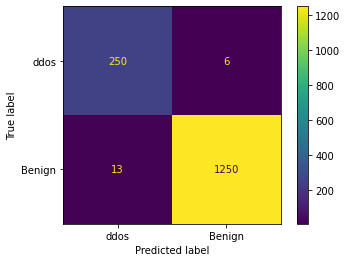

In [108]:
confusion_mtx = confusion_matrix(test_lbl, clf.predict(test))
np.round(confusion_mtx/len(test_lbl), 3)
plot_confusion_matrix(clf, test, test_lbl, labels=['ddos', 'Benign'])

## Modell speichern

In [109]:
dump(clf, 'models/sgd.joblib')

['models/sgd.joblib']